In [ ]:
!pip install deepxde

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.3/165.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 9.8 MB/s eta 0:00:00


In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Importing DeepXDE library for solving partial differential equations using deep learning
import deepxde as dde

# Importing Scikit-Optimize library for Bayesian hyperparameter optimization
import skopt
from skopt import gp_minimize
from skopt.plots import plot_convergence, plot_objective
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args

# **Define the PDE with boundary conditions**

No backend selected.
Finding available backend...


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


0 it number
learning rate: 1.0e-03
num_dense_layers: 4
num_dense_nodes: 50
activation: sin
lamda: 0.01

Compiling model...
Building feed-forward neural network...
'build' took 0.108514 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 4.595918 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.33e-02, 7.16e-04, 8.28e-03]    [2.31e-02, 7.16e-04, 8.28e-03]    []  
100       [4.02e-06, 7.92e-05, 4.83e-03]    [3.91e-06, 7.92e-05, 4.83e-03]    []  
200       [4.08e-06, 8.11e-05, 4.80e-03]    [2.40e-06, 8.11e-05, 4.80e-03]    []  
300       [9.85e-06, 8.59e-05, 4.76e-03]    [4.52e-06, 8.59e-05, 4.76e-03]    []  
400       [2.10e-05, 8.77e-05, 4.69e-03]    [1.08e-05, 8.77e-05, 4.69e-03]    []  
500       [4.35e-05, 9.36e-05, 4.56e-03]    [2.90e-05, 9.36e-05, 4.56e-03]    []  
600       [6.35e-05, 1.16e-04, 4.37e-03]    [3.30e-05, 1.16e-04, 4.37e-03]    []  
700       [1.04e-04, 1.25e-04, 4.06e-03]    [4.19e-05, 1.25e-04, 4.06e-03]    []  
800       [1.66e-04, 1.27e-04, 3.68e-03]    [1.07e-04, 1.27e-04, 3.68e-03]    []  
900       [3.65e-04, 1.20e-04, 3.31e-03]    [2.50e-04, 1.20e-04, 3.31e-03]    []  
1000      [2.48e-04, 1.07e-04, 2.8

/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 1.914738 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [9.86e-02, 8.84e-01, 1.64e+00]    [1.25e-01, 8.84e-01, 1.64e+00]    []  
100       [9.34e-02, 7.94e-01, 1.50e+00]    [1.18e-01, 7.94e-01, 1.50e+00]    []  
200       [8.95e-02, 7.10e-01, 1.37e+00]    [1.13e-01, 7.10e-01, 1.37e+00]    []  
300       [8.67e-02, 6.29e-01, 1.25e+00]    [1.09e-01, 6.29e-01, 1.25e+00]    []  
400       [8.46e-02, 5.52e-01, 1.14e+00]    [1.05e-01, 5.52e-01, 1.14e+00]    []  
500       [8.34e-02, 4.77e-01, 1.04e+00]    [1.03e-01, 4.77e-01, 1.04e+00]    []  
600       [8.26e-02, 4.07e-01, 9.45e-01]    [1.00e-01, 4.07e-01, 9.45e-01]    []  
700       [8.22e-02, 3.41e-01, 8.59e-01]    [9.75e-02, 3.41e-01, 8.59e-01]    []  
800       [8.18e-02, 2.79e-01, 7.83e-01]    [9.48e-02, 2.79e-01, 7.83e-01]    []  
900       [8.10e-02, 2.24e-01, 7.16e-01]    [9.17e-02, 2.24e-01, 7.16e-01]    []  
1000      [7.97e-02, 1.76e-01, 6.6

/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 6.697986 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [4.25e-01, 2.25e-03, 5.10e-03]    [2.87e-01, 2.25e-03, 5.10e-03]    []  
100       [4.81e-06, 4.27e-06, 5.00e-03]    [4.07e-06, 4.27e-06, 5.00e-03]    []  
200       [3.49e-06, 4.76e-06, 4.99e-03]    [3.24e-06, 4.76e-06, 4.99e-03]    []  
300       [3.11e-06, 6.77e-06, 4.98e-03]    [2.48e-06, 6.77e-06, 4.98e-03]    []  
400       [3.87e-06, 1.07e-05, 4.97e-03]    [2.57e-06, 1.07e-05, 4.97e-03]    []  
500       [6.25e-06, 1.69e-05, 4.95e-03]    [4.38e-06, 1.69e-05, 4.95e-03]    []  
600       [7.66e-06, 2.37e-05, 4.93e-03]    [5.64e-06, 2.37e-05, 4.93e-03]    []  
700       [6.16e-06, 3.06e-05, 4.91e-03]    [5.11e-06, 3.06e-05, 4.91e-03]    []  
800       [5.65e-06, 3.77e-05, 4.89e-03]    [4.74e-06, 3.77e-05, 4.89e-03]    []  
900       [8.89e-06, 4.27e-05, 4.87e-03]    [6.05e-06, 4.27e-05, 4.87e-03]    []  
1000      [1.42e-05, 4.38e-05, 4.8

array([[<Axes: xlabel='learning_rate', ylabel='Partial dependence'>,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='num_dense_layers'>,
        <Axes: xlabel='num_dense_layers', ylabel='Partial dependence'>,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='num_dense_nodes'>, <Axes: >,
        <Axes: xlabel='num_dense_nodes', ylabel='Partial dependence'>,
        <Axes: >, <Axes: >],
       [<Axes: ylabel='activation'>, <Axes: >, <Axes: >,
        <Axes: xlabel='activation', ylabel='Partial dependence'>,
        <Axes: >],
       [<Axes: xlabel='learning_rate', ylabel='lamda'>,
        <Axes: xlabel='num_dense_layers'>,
        <Axes: xlabel='num_dense_nodes'>, <Axes: xlabel='activation'>,
        <Axes: xlabel='lamda', ylabel='Partial dependence'>]],
      dtype=object)

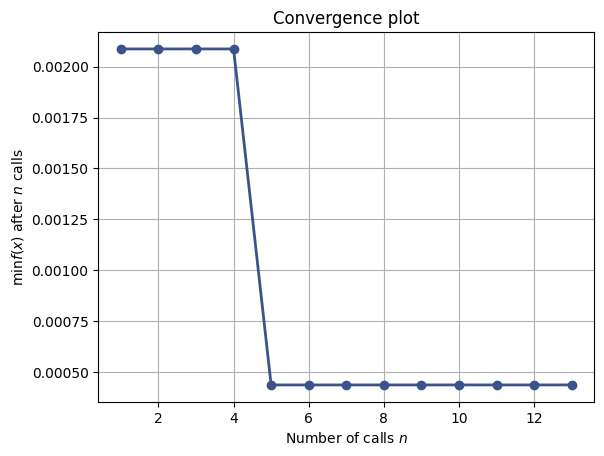

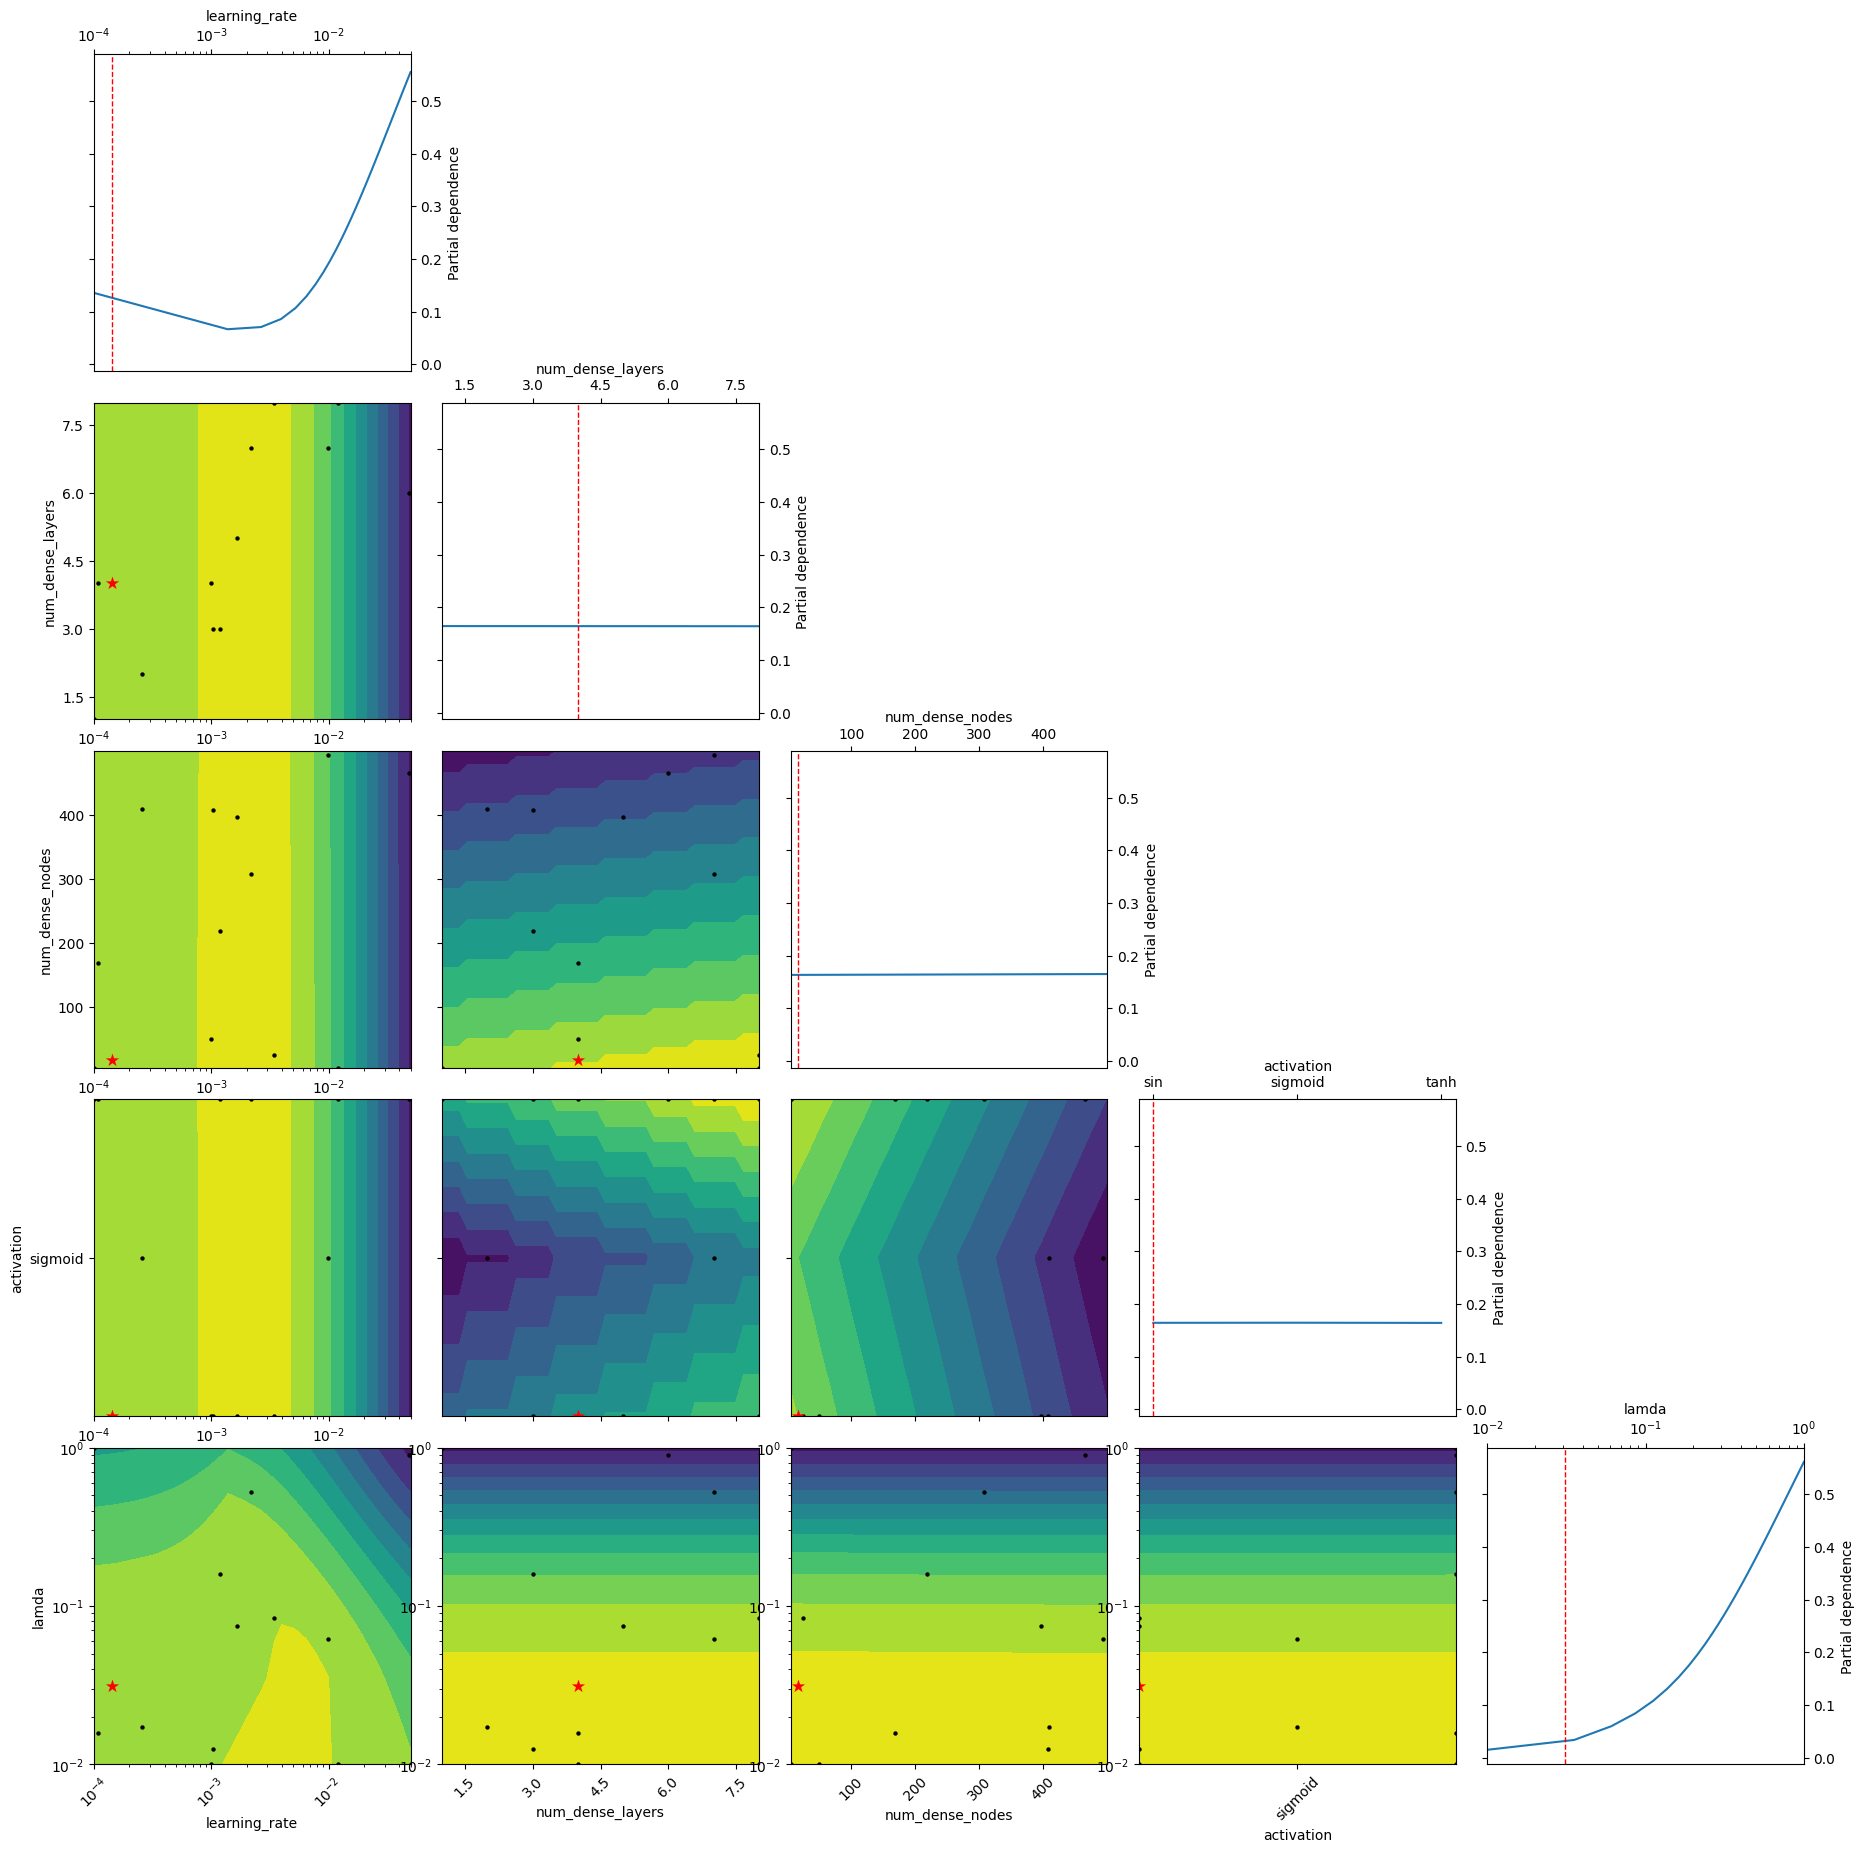

In [ ]:


if dde.backend.backend_name == "pytorch":
    sin = dde.backend.pytorch.sin
else:
    from deepxde.backend import tf

    sin = tf.sin



def pde(x, y):
    dy_x = dde.grad.jacobian(y, x, i=0, j=0)
    dy_t = dde.grad.jacobian(y, x, i=0, j=1)
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    dy_xxx = dde.grad.hessian(dy_x, x, i=0, j=0)
    dy_xxxx = dde.grad.hessian(dy_xx, x,i=0, j=0)

    return dy_t + y * dy_x -0.5 * dy_xx


def create_model(config):
    learning_rate, num_dense_layers, num_dense_nodes, activation,lamda = config

    geom = dde.geometry.Interval(0, 10)
    timedomain = dde.geometry.TimeDomain(0, 1)
    geomtime = dde.geometry.GeometryXTime(geom, timedomain)

    bc = dde.DirichletBC(geomtime, lambda x: 0, lambda _, on_boundary: on_boundary)
    ic = dde.IC(geomtime, lambda x: np.sin((3.0/5)*np.pi * x[:, 0:1]), lambda _, on_initial: on_initial)
    data = dde.data.TimePDE(geomtime, pde, [bc, ic], num_domain=500,  num_boundary=100, num_initial=100,num_test=1000)
    net = dde.maps.FNN(
        [d] + [num_dense_nodes] * num_dense_layers + [1],
        activation,
        "Glorot uniform",
    )


    model = dde.Model(data, net)
    model.compile("adam", lr=learning_rate,loss_weights=[1, lamda, lamda])
    return model

def train_model(model, config):
    early_stopping = dde.callbacks.EarlyStopping( monitor="loss_train", min_delta=1e-8, patience=100)
    #early_stopping = dde.callbacks.EarlyStopping(min_delta=1e-4, patience=10)
    losshistory, train_state = model.train(epochs=epochs,disregard_previous_best=True, callbacks=[early_stopping],display_every=100)
    train = np.array(losshistory.loss_train).sum(axis=1).ravel()
    test = np.array(losshistory.loss_test).sum(axis=1).ravel()
    metric = np.array(losshistory.metrics_test).sum(axis=1).ravel()

    error = test.min()
    return error


# HPO setting
n_calls = 13
dim_learning_rate = Real(low=1e-4, high=5e-2, name="learning_rate", prior="log-uniform")
dim_num_dense_layers = Integer(low=1, high=8, name="num_dense_layers")
dim_num_dense_nodes = Integer(low=5, high=500, name="num_dense_nodes")
dim_activation = Categorical(categories=["sin", "sigmoid", "tanh"], name="activation")
lamda = Real(low=0.01, high=1, name="lamda", prior="log-uniform")


dimensions = [
    dim_learning_rate,
    dim_num_dense_layers,
    dim_num_dense_nodes,
    dim_activation,
    lamda
]

default_parameters = [1e-3, 4, 50, "sin",0.01]


@use_named_args(dimensions=dimensions)
def fitness(learning_rate, num_dense_layers, num_dense_nodes, activation,lamda):

    config = [learning_rate, num_dense_layers, num_dense_nodes, activation,lamda]
    global ITERATION

    print(ITERATION, "it number")
    # Print the hyper-parameters.
    print("learning rate: {0:.1e}".format(learning_rate))
    print("num_dense_layers:", num_dense_layers)
    print("num_dense_nodes:", num_dense_nodes)
    print("activation:", activation)
    print("lamda:", lamda)
    print()

    # Create the neural network with these hyper-parameters.
    model = create_model(config)
    # possibility to change where we save
    error = train_model(model, config)
    # print(accuracy, 'accuracy is')

    if np.isnan(error):
        error = 10**5

    ITERATION += 1
    return error


ITERATION = 0

search_result = gp_minimize(
    func=fitness,
    dimensions=dimensions,
    acq_func="EI",  # Expected Improvement.
    n_calls=n_calls,
    x0=default_parameters,
    random_state=1234,
)

print(search_result.x)

plot_convergence(search_result)
plot_objective(search_result, show_points=True, size=3.8)
